# __1-1. Regression Overview: Introduction__

## __1.강의를 듣기 위해 필요한 선행지식__
1) 기본 미적분 지식 <br>
2) 기본 통계학 지식 <br>
3) 기본 선형대수학 지식 <br>
4) 어느정도의 파이썬 실력 <br>

## __2.회귀란 무엇인가?__
데이터가 주어진 상황에서, Dependent Variable 이라고 불리는 변수 $Y$와 해당 변수를 제외한 나머지 변수 Independent Variables $X$ 사이의 관계를 추정하는 기법 중 하나이다. <br><br>
좀 더 자세하게 보자.<br><br>
$N$개의 데이터가 주어졌고, $i$번째 데이터는 $n$차원 벡터 $X_i$와 스칼라 $Y_i$로 구성된 $(X_i,Y_i)$의 쌍으로 나타낼 수 있다고 하자. 즉, 데이터셋은 $S=\{(X_i,Y_i): i=1,2,...,N\}$로 표현 가능하다. <br> 회귀분석은 이렇게 데이터셋이 주어진 경우 Dependent Variable $Y_i$와 Independent Variable $X_i$의 관계를 알아내는 것을 목표로 한다. 관계를 알아낸다는 것은 두 변수 사이의 함수 $Y_i = f(X_i, \beta) + e_i$ 를 추정하는 것을 의미한다. (이 식에 대한 자세한 설명은 나중에 다룬다.)

In [8]:
import pandas as pd

csv_sample = pd.read_csv('./1_regression_overview.csv')
csv_sample

,OverallQual,OverallCond,TotalArea,Bedroom,Price
0,7,9,143,4,500402
1,8,9,264,8,1204600
2,4,5,378,11,1385000
3,7,6,168,6,859000
4,6,8,155,5,615300
5,3,5,84,3,451000
6,9,6,275,8,980000
7,8,9,183,6,1040000
8,9,9,305,7,1462000
9,6,6,208,6,895300


예를 들어서, 위와 같이 집의 스펙과 가격에 대한 데이터가 주어졌을 때 여러 스펙들과 가격 사이의 관계를 알아내는 회귀분석의 경우 각각의 스펙과 가격이 선형적인 관계를 가지고 있다고 가정하면 아래와 같은 Linear Regression Model을 만들 수 있다. parameter $\beta$ 들은 이후 여러 가지 fitting 방식을 통해 구하게된다.<br>

##### $\text{Price}_i = \beta_1 (\text{OveralQual}_i) \ + \ \beta_2 (\text{OveralCond}_i) \ + \beta_3 (\text{TotalArea}_i) \ + \beta_4 (\text{Bedroom}_i) \ + e_i$

회귀분석이 어떠한 과정으로 이루어지는지 간략하게 알아보자. 회귀분석은 '''데이터 수집 → 데이터 전처리 → 모델링(함수 형태 결정) → 모수 추정 → 추정 검정 → 해석 → 활용(prediction 등)'''의 과정으로 이루어진다. 보통의 통계학 수업에서 접하는 회귀는 추정과 추정의 검정에 초점을 맞추기 때문에 앞 뒤의 과정이 새롭게 느껴질 수 있다.

## 3. 여러가지 관점에서 본 회귀
회귀분석은 여러가지 분야에서 사용되는 굉장히 일반적인 방법론이고, 그렇기에 회귀분석을 설명하는 방식도 다양하다. 각 분야에서 회귀를 어떻게 바라보는지 간단하게만 체크해보고자 한다.<br>
(참고 : 최근에는 각 분야간 관점 차이가 조금씩 사라지고 있으며, 하나의 분야에서도 여러 세부분야에 따라 다양한 관점을 가진다. 때문에 아래의 관점은 그냥 회귀를 어떻게 바라볼 수 있는지에 대해서 참고용으로만 보자)

**1) 통계 :** 통계는 데이터가 주어졌을 때, 모델링을 한 후 모수를 추정하거나 가설을 검정하고 이후 결과를 해석하는 과정이다. (모수 추정과 검정은 엄밀하게 다른 과정이다) 이를 회귀분석에 그대로 적용시키면, 통계학에서의 회귀는 함수 모델을 결정하고, 모수를 추정하거나, 회귀 함수가 유의한지 혹은 개별 회귀 계수가 유의한지 검정하는 과정에 포커스를 둔다.

**2) 기계학습** : 기계학습은 지도학습(Supervised Learning)과 비지도학습(Unsupervised Learning)으로 나뉘며, 지도학습은 연속형 변수를 예측하는 회귀(Regression)와 범주형 변수를 예측하는 분류(Classification)으로 나뉜다. ML에서 회귀는 연속형 변수를 예측하는 방법론이고, 검정보다는 모델링과 성능 향상에 초점을 맞춘다.

**3) 수학** : 회귀(와 더불어 supervised learning분야)는 결국 두 변수 사이의 관계를 가장 잘 나타내는 함수, 즉 최적 함수(Optimal Function)을 찾는 문제이다. 수학에서는 이 함수를 어떻게 찾을지, 혹은 해당 함수가 존재하는지 등에 관심을 가진다.

**4) 사회과학** : 회귀분석의 이론적인 분석보다는 활용(Application)으로, 즉 데이터 사이의 관계를 분석하는 도구로 쓰인다.

## 4. 실제 활용 예시
회귀는 결국 데이터의 변수들 사이에 있는 관계가 연속 함수(continuous function)라고 가정하고, 해당 함수의 모수를 추정하거나 모수에 대한 가설 검정을 수행하는 과정입니다. 아래의 코드에서는 회귀 중에서 가장 간단한 Simple Linear Regression, 즉 하나의 Dependent variable과 하나의 Independent variable의 선형 관계식을 추정을 수행하였습니다.

1) 랜덤으로 직선 y = 2x-1 에 근접한 점을 발생시키고, 이 점들을 fitting하면 어떠한 직선이 나오는지 확인해보는 코드입니다. 아래 코드에서는 sklearn의 LinearRegreession 패키지를 사용하였지만, 나중에는 직접 하드코딩하여 회귀분석을 진행해볼 예정입니다.

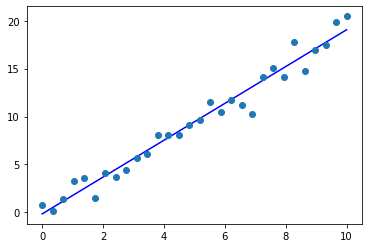

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x_start, x_fin = 0, 10

# 근사적으로 y = 2x-1 을 따르는 데이터 발생시키기
np.random.seed(0)
n = 30
x = np.linspace(x_start, x_fin, n)
y = x*2 - 1 + 1*np.random.randn(n)

model = LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)
xfit = np.linspace(x_start, x_fin, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit, color="blue")
plt.plot(x,y, 'o')
plt.show()

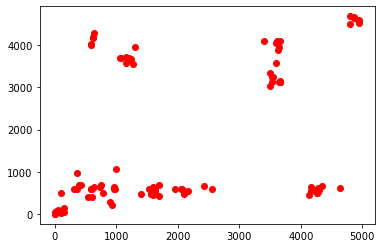

In [4]:
RESTAURANT_LOCATIONS = [
  [2, 2], [5, 2], [10, 53], [30, 66], [59, 104], [104, 20], [150, 59], [142, 152], [30, 70], [25, 50],
  [55,63],[643,632],[737,634],[603,402],[783,486],[750,693],[425,694],[364,964],[593,604],[968,593],
  [602,603],[969,642],[536,405],[305,604],[359,604],[105,503],[983,593],[395,682],[993,1059],[592,604],
  [2094,504],[2069,604],[2054,603],[2559,602],[2095,469],[1959,594],[2429,672],[930,205],[891,295],[2159,542],
  [4950,4605],[4869,4650],[4800,4685],[4930,4592],[4869,4659],[4950,4522],[4796,4500],[3503,3035],[3596,3583],[3544,3250],
  [3502,3342],[3529,3124], [3529, 3249], [3653, 3135], [3669, 3125], [3653, 3130], [3654, 3153], [3651, 3125], [3656, 3127],
  [4264, 502],[4265,503],[4275,525],[4297,563],[4632,614],[4126,452],[4352,654],[4256,562],[4167,634],[4162,542],[4275,611],
  [1062,3694],[1214,3699],[1152,3714],[1231,3671],[1160,3569],[1211,3671],[1079,3699],[1196,3651],[1296,3964],[1264,3546],
  [1692,421],[1596,460],[1569,469],[1624,541],[1406,469],[1562,469],[1692,692],[1624,561],[1529,592],[1634,496],[1592,642],
  [3402,4092],[3653,4105],[3592,4042],[3649,3950],[3624,3896],[3619,4105],[595,4029],[594,4012],[642,4291],[613,4168],[623,4196]
]
x = []
y = []

for i in RESTAURANT_LOCATIONS:
    x.append(i[0])
    y.append(i[1])
    
plt.plot(x,y,'o',color="red")
plt.show()

2) 아래는 공부시간(Hours of Study)과 실제 시험 점수(Test Scores)간의 관계를 선형 모델로 회귀분석한 코드입니다. 공부를 많이 할수록 시험 점수가 높을 것이라는 예상과 동일하게 양의 기울기를 가진 선형 모델을 얻었습니다.

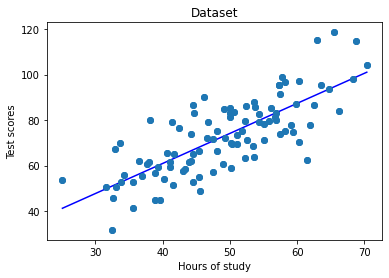

In [15]:
%matplotlib inline
from IPython.display import HTML
from numpy import *
import matplotlib.pyplot as plt
import urllib
from sklearn.linear_model import LinearRegression

#Datas from CC-MNNIT class
urllib.request.urlretrieve("https://raw.githubusercontent.com/CC-MNNIT/2018-19-Classes/master/MachineLearning/2018_08_22_Logical-Rhythm-2/data.csv", "data.csv")
data = genfromtxt('data.csv', delimiter=',')

#Extract Datas
x = array(data[:,0])
y = array(data[:,1])
x_start = min(x)
x_fin = max(x)

#Fitting Regression Line
model = LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)
xfit = np.linspace(x_start, x_fin, 100)
yfit = model.predict(xfit[:, np.newaxis])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.plot(xfit, yfit, color="blue")
plt.plot(x,y, 'o')

plt.show()

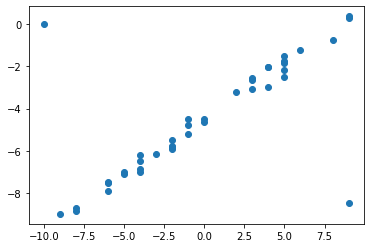

In [1]:
%matplotlib inline
from IPython.display import HTML
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from sklearn.linear_model import LinearRegression

#Datas from CC-MNNIT class
data = pd.read_csv('./hwpoints.csv')

#Extract Datas
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [6]:
m = 0
c = 0

L = 0.001  # The learning Rate
epochs = 3000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.36650560058021203 -4.4769607662371005


## 5. 회귀분석 수업 로드맵

앞으로 진행될 수업 로드맵입니다! (계속 업데이트 될 예정입니다.)

1) Regression Overview

1-1) Introduction

1-2) Regression Process Overview 1

1-3) Regression Process Overview 2

2) Linear Regression

3) Logistic Regression

4) Softmax Regression

5) Overfitting & Underfitting

6) Polynomial Regression

7) Regression Spline